In [191]:
import numpy as np 
import pandas as pd
import os
from tqdm import tqdm
import graph_tool as gt
import scipy as sp
import matplotlib.pyplot as plt

In BIOGRID_data/VIRUS_from_BIOGRID I have all the viruses interaction data downloaded from BIOGRID. With this script I wanto to create a list of file in which from each of this files, I exctract the human proteins directly targeted by the viruses and unifrom the nomenclature with the NCBI one.
I will save all this file in the BIOGRID_to_VIRPROT.

# From BIOGRID interaction file for human viruses, exctract list of human proteins directly targeted by the viruses

In [198]:
dir_list = os.listdir("../Data/data_BIOGRID/VIRUS_from_BIOGRID")
names_list = [vn[17:-18] for vn in dir_list]
dir_list

['BIOGRID-ORGANISM-Human_papillomavirus_6b-4.4.220.mitab.txt',
 'BIOGRID-ORGANISM-Human_papillomavirus_9-4.4.220.mitab.txt',
 'BIOGRID-ORGANISM-Human_Herpesvirus_6B-4.4.220.mitab.txt',
 'BIOGRID-ORGANISM-Human_Herpesvirus_5-4.4.220.mitab.txt',
 'BIOGRID-ORGANISM-Human_papillomavirus_32-4.4.220.mitab.txt',
 'BIOGRID-ORGANISM-Severe_acute_respiratory_syndrome_coronavirus_2-4.4.220.mitab.txt',
 'BIOGRID-ORGANISM-Human_Immunodeficiency_Virus_2-4.4.220.mitab.txt',
 'BIOGRID-ORGANISM-Vaccinia_Virus-4.4.220.mitab.txt',
 'BIOGRID-ORGANISM-Human_Herpesvirus_4-4.4.220.mitab.txt',
 'BIOGRID-ORGANISM-Severe_acute_respiratory_syndrome_coronavirus-4.4.220.mitab.txt',
 'BIOGRID-ORGANISM-Human_Herpesvirus_2-4.4.220.mitab.txt',
 'BIOGRID-ORGANISM-Human_Immunodeficiency_Virus_1-4.4.220.mitab.txt',
 'BIOGRID-ORGANISM-Human_Herpesvirus_3-4.4.220.mitab.txt',
 'BIOGRID-ORGANISM-Human_papillomavirus_10-4.4.220.mitab.txt',
 'BIOGRID-ORGANISM-Human_papillomavirus_7-4.4.220.mitab.txt',
 'BIOGRID-ORGANISM-Human_

In [176]:
virus_ppi_all

,#ID Interactor A,ID Interactor B,Alt IDs Interactor A,Alt IDs Interactor B,Aliases Interactor A,Aliases Interactor B,Interaction Detection Method,Publication 1st Author,Publication Identifiers,Taxid Interactor A,Taxid Interactor B,Interaction Types,Source Database,Interaction Identifiers,Confidence Values
0,entrez gene/locuslink:1489368,entrez gene/locuslink:7337,biogrid:3509162|entrez gene/locuslink:E6|entre...,biogrid:113185|entrez gene/locuslink:UBE3A|uni...,-,entrez gene/locuslink:ANCR(gene name synonym)|...,"psi-mi:""MI:0090""(protein complementation assay)",Poirson J (2017),pubmed:28786561,taxid:10600,taxid:9606,"psi-mi:""MI:0407""(direct interaction)","psi-mi:""MI:0463""(biogrid)",biogrid:2484839,-
1,entrez gene/locuslink:1489368,entrez gene/locuslink:23024,biogrid:3509162|entrez gene/locuslink:E6|entre...,biogrid:116664|entrez gene/locuslink:PDZRN3|un...,-,entrez gene/locuslink:LNX3(gene name synonym)|...,"psi-mi:""MI:0090""(protein complementation assay)",Poirson J (2017),pubmed:28786561,taxid:10600,taxid:9606,"psi-mi:""MI:0407""(direct interaction)","psi-mi:""MI:0463""(biogrid)",biogrid:2484840,-
2,entrez gene/locuslink:1489368,entrez gene/locuslink:23295,biogrid:3509162|entrez gene/locuslink:E6|entre...,biogrid:116890|entrez gene/locuslink:MGRN1|uni...,-,entrez gene/locuslink:RNF156(gene name synonym),"psi-mi:""MI:0090""(protein complementation assay)",Poirson J (2017),pubmed:28786561,taxid:10600,taxid:9606,"psi-mi:""MI:0407""(direct interaction)","psi-mi:""MI:0463""(biogrid)",biogrid:2484841,-
3,entrez gene/locuslink:1489369,entrez gene/locuslink:5784,biogrid:3509163|entrez gene/locuslink:E7|entre...,biogrid:111748|entrez gene/locuslink:PTPN14|en...,-,entrez gene/locuslink:PEZ(gene name synonym)|e...,"psi-mi:""MI:0090""(protein complementation assay)",Poirson J (2017),pubmed:28786561,taxid:10600,taxid:9606,"psi-mi:""MI:0407""(direct interaction)","psi-mi:""MI:0463""(biogrid)",biogrid:2484842,-
4,entrez gene/locuslink:1489369,entrez gene/locuslink:5933,biogrid:3509163|entrez gene/locuslink:E7|entre...,biogrid:111868|entrez gene/locuslink:RBL1|entr...,-,entrez gene/locuslink:CP107(gene name synonym)...,"psi-mi:""MI:0090""(protein complementation assay)",Poirson J (2017),pubmed:28786561,taxid:10600,taxid:9606,"psi-mi:""MI:0407""(direct interaction)","psi-mi:""MI:0463""(biogrid)",biogrid:2484843,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,entrez gene/locuslink:1489369,entrez gene/locuslink:9859,biogrid:3509163|entrez gene/locuslink:E7|entre...,biogrid:115193|entrez gene/locuslink:CEP170|un...,-,entrez gene/locuslink:FAM68A(gene name synonym...,"psi-mi:""MI:0004""(affinity chromatography techn...",Rozenblatt-Rosen O (2012),pubmed:22810586,taxid:10600,taxid:9606,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0463""(biogrid)",biogrid:2888590,-
588,entrez gene/locuslink:1489369,entrez gene/locuslink:160,biogrid:3509163|entrez gene/locuslink:E7|entre...,biogrid:106669|entrez gene/locuslink:AP2A1|uni...,-,entrez gene/locuslink:ADTAA(gene name synonym)...,"psi-mi:""MI:0004""(affinity chromatography techn...",Rozenblatt-Rosen O (2012),pubmed:22810586,taxid:10600,taxid:9606,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0463""(biogrid)",biogrid:2888591,-
589,entrez gene/locuslink:1489369,entrez gene/locuslink:1267,biogrid:3509163|entrez gene/locuslink:E7|entre...,biogrid:107667|entrez gene/locuslink:CNP|unipr...,-,entrez gene/locuslink:CNP1(gene name synonym),"psi-mi:""MI:0004""(affinity chromatography techn...",Rozenblatt-Rosen O (2012),pubmed:22810586,taxid:10600,taxid:9606,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0463""(biogrid)",biogrid:2888592,-
590,entrez gene/locuslink:1489369,entrez gene/locuslink:1173,biogrid:3509163|entrez gene/locuslink:E7|entre...,biogrid:107587|entrez gene/locuslink:AP2M1|uni...,-,entrez gene/locuslink:AP50(gene name synonym)|...,"psi-mi:""MI:0004""(affinity chromatography techn...",Rozenblatt-Rosen O (2012),pubmed:22810586,taxid:10600,tax

In [186]:
human_prot_in_vir[["source", "target"]].to_csv("../Data/data_BIOGRID/edgg.csv", index=False)

In [187]:
#load ncbi database
ncbi = pd.read_csv("../Data/data_BIOGRID/Homo_sapiens.gene_info", sep="\t")
symbols = ncbi["Symbol"]
synonyms = [ncbi["Synonyms"][i].split("|") for i in range(len(ncbi))]
unique_synonims = np.unique(np.concatenate(synonyms))


for vn in tqdm(dir_list):
    #load all the annotations on interactions between virus and human
    if not os.path.isdir("../Data/data_BIOGRID/BIOGRID_to_VIRPROT/"+vn[17:-18]):
        os.mkdir("../Data/data_BIOGRID/BIOGRID_to_VIRPROT/"+vn[17:-18])
    
    virus_ppi_all = pd.read_csv("../Data/data_BIOGRID/VIRUS_from_BIOGRID/"+vn, sep="\t")

    #create processed edge list
    virus_ppi = pd.DataFrame()
    virus_ppi["source"] = [int(virus_ppi_all.iloc[i,2].split("|")[0].replace("biogrid:", "")) for i in range(len(virus_ppi_all))]
    virus_ppi["target"] = [int(virus_ppi_all.iloc[i,3].split("|")[0].replace("biogrid:", "")) for i in range(len(virus_ppi_all))]
    virus_ppi["inhum"] = np.any([virus_ppi_all["Taxid Interactor A"]=="taxid:9606", virus_ppi_all["Taxid Interactor B"]=="taxid:9606"], axis=0)
    virus_ppi["type"] = virus_ppi_all["Interaction Types"]

    #select human proteins only which appear at leat once
    human_prot_in_vir = virus_ppi[virus_ppi["inhum"]]
    human_prot_in_vir[["source", "target"]].to_csv("../Data/data_BIOGRID/BIOGRID_to_VIRPROT/"+vn[17:-18]+"/edges_biogrid.csv", index=False)
    
    un_bio_nodes = np.unique(human_prot_in_vir[["source", "target"]].to_numpy())
    map_biogrid_nodes = dict(zip(un_bio_nodes, np.arange(len(un_bio_nodes))))
    
    pd.DataFrame({"source": human_prot_in_vir["source"].map(map_biogrid_nodes),
                  "target": human_prot_in_vir["target"].map(map_biogrid_nodes)}).to_csv("../Data/data_BIOGRID/BIOGRID_to_VIRPROT/"+vn[17:-18]+"/edges_mapped.csv", index=False)
    np.savetxt(X=un_bio_nodes, fname = "../Data/data_BIOGRID/BIOGRID_to_VIRPROT/"+vn[17:-18]+"/nodes_bio.txt", fmt="%s")
    '''
    #select proteins that are in ncbi index, and check if the others are related to some synonim, if true, pick the standard name
    ncbi_prots = human_prot_in_vir[np.isin(human_prot_in_vir, symbols)]
    not_ncbi_prots = human_prot_in_vir[np.logical_not(np.isin(human_prot_in_vir, symbols))]
    but_synon = np.isin(human_prot_in_vir[np.logical_not(np.isin(human_prot_in_vir, symbols))], unique_synonims)

    new_names = []
    for i in range(len(not_ncbi_prots)):
        if but_synon[i]:
            new_names.append(symbols[([not_ncbi_prots[i] in s for s in synonyms])].values[0])

    def_names = np.concatenate([ncbi_prots, new_names])
    np.savetxt(X=def_names, fname = "../Data/data_BIOGRID/BIOGRID_to_VIRPROT/"+vn[17:-18]+"/nodes.txt", fmt="%s")
    '''

100%|███████████████████████████████████████████| 23/23 [00:05<00:00,  3.96it/s]


In [189]:
t1_nodes = []
for vn in tqdm(dir_list):
    nodes = np.loadtxt("../Data/data_BIOGRID/BIOGRID_to_VIRPROT/"+vn[17:-18]+"/nodes_bio.txt")
    t1_nodes.append(len(nodes))

100%|█████████████████████████████████████████| 23/23 [00:00<00:00, 3153.20it/s]


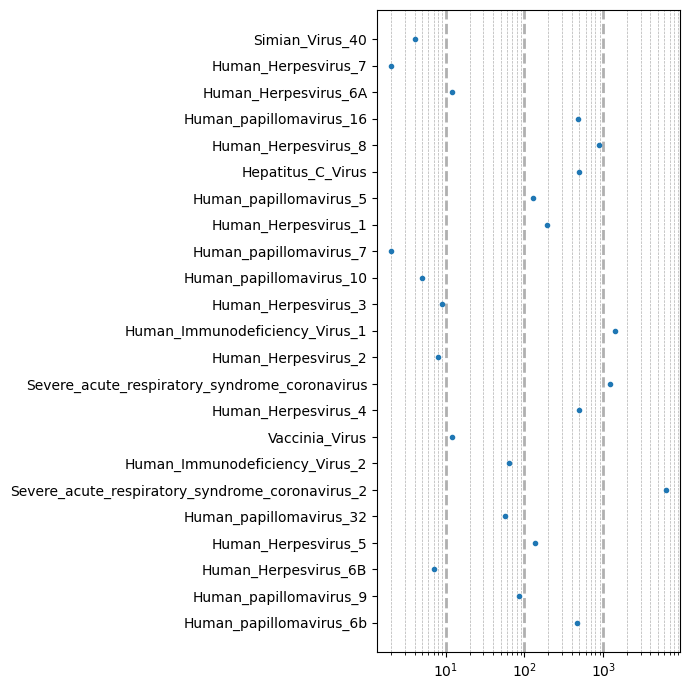

In [215]:
plt.figure(figsize=(7,7))
plt.plot(t1_nodes, np.arange(len(t1_nodes)), ".")
plt.xscale("log")
plt.yticks(np.arange(len(t1_nodes)), labels=names_list)
plt.grid(axis="x", ls="--", which="major", lw=2)
plt.grid(axis="x", ls="--", which="minor", lw=0.5)
plt.tight_layout()

# Take data from the Covid19 project of BIOGRID, in which I have PPI for Sars-Cov, Sars-Cov2, MERS

In [196]:
nodes_covid = pd.read_csv("data_BIOGRID/Covid_project/BIOGRID-PROJECT-covid19_coronavirus_project-GENES-4.4.220.projectindex.txt", sep="\t")
nodes_covid.columns

Index(['#BIOGRID ID', 'ENTREZ GENE ID', 'SYSTEMATIC NAME', 'OFFICIAL SYMBOL',
       'SYNONYMS', 'ORGANISM ID', 'ORGANISM NAME', 'INTERACTION COUNT',
       'PTM COUNT', 'CHEMICAL INTERACTION COUNT', 'SOURCE', 'VIRUS VALUES',
       'VIRUS IDS', 'VIRUS TAGS', 'VIRUS EVIDENCE VALUES',
       'VIRUS EVIDENCE IDS', 'VIRUS EVIDENCE CLASSES',
       'VIRUS EVIDENCE METHODS'],
      dtype='object')

In [197]:
interactions_covid = pd.read_csv("data_BIOGRID/Covid_project/BIOGRID-PROJECT-covid19_coronavirus_project-INTERACTIONS-4.4.220.tab3.txt", sep="\t")
interactions_covid.columns

Index(['#BioGRID Interaction ID', 'Entrez Gene Interactor A',
       'Entrez Gene Interactor B', 'BioGRID ID Interactor A',
       'BioGRID ID Interactor B', 'Systematic Name Interactor A',
       'Systematic Name Interactor B', 'Official Symbol Interactor A',
       'Official Symbol Interactor B', 'Synonyms Interactor A',
       'Synonyms Interactor B', 'Experimental System',
       'Experimental System Type', 'Author', 'Publication Source',
       'Organism ID Interactor A', 'Organism ID Interactor B', 'Throughput',
       'Score', 'Modification', 'Qualifications', 'Tags', 'Source Database',
       'SWISS-PROT Accessions Interactor A', 'TREMBL Accessions Interactor A',
       'REFSEQ Accessions Interactor A', 'SWISS-PROT Accessions Interactor B',
       'TREMBL Accessions Interactor B', 'REFSEQ Accessions Interactor B',
       'Ontology Term IDs', 'Ontology Term Names', 'Ontology Term Categories',
       'Ontology Term Qualifier IDs', 'Ontology Term Qualifier Names',
       'Ontology

In [32]:
interactions_sarscov2 = interactions_covid[(interactions_covid["Organism ID Interactor A"]==2697049)|(interactions_covid["Organism ID Interactor B"]==2697049)]
interactions_sarscov = interactions_covid[(interactions_covid["Organism ID Interactor A"]==694009)|(interactions_covid["Organism ID Interactor B"]==694009)]
interactions_mers = interactions_covid[(interactions_covid["Organism ID Interactor A"]==1335626)|(interactions_covid["Organism ID Interactor B"]==1335626)]

In [200]:
virus_ppi.to_csv("data_BIOGRID/Covid_project/sarscov2net.txt", sep=" ", index=False)

In [198]:
#do the same things for sarscov2, sarscov and mers

virus_ppi = pd.DataFrame()
virus_ppi["source"] = interactions_sarscov2["Official Symbol Interactor A"]
virus_ppi["target"] = interactions_sarscov2["Official Symbol Interactor B"]
virus_ppi["source ishum"] = interactions_sarscov2["Organism ID Interactor A"]==9606
virus_ppi["target ishum"] = interactions_sarscov2["Organism ID Interactor B"]==9606

#select human proteins only which appear at leat once
human_prot_in_vir = np.unique(np.concatenate([virus_ppi[virus_ppi["source ishum"]]["source"], virus_ppi[virus_ppi["target ishum"]]["target"]]))

#load ncbi database
ncbi = pd.read_csv("data_BIOGRID/Homo_sapiens.gene_info", sep="\t")
symbols = ncbi["Symbol"]
synonyms = [ncbi["Synonyms"][i].split("|") for i in range(len(ncbi))]
unique_synonims = np.unique(np.concatenate(synonyms))

#select proteins that are in ncbi index, and check if the others are related to some synonim, if true, pick the standard name
ncbi_prots = human_prot_in_vir[np.isin(human_prot_in_vir, symbols)]
not_ncbi_prots = human_prot_in_vir[np.logical_not(np.isin(human_prot_in_vir, symbols))]
but_synon = np.isin(human_prot_in_vir[np.logical_not(np.isin(human_prot_in_vir, symbols))], unique_synonims)

new_names = []
for i in range(len(not_ncbi_prots)):
    if but_synon[i]:
        new_names.append(symbols[([not_ncbi_prots[i] in s for s in synonyms])].values[0])

def_names = np.concatenate([ncbi_prots, new_names])
#np.savetxt(X=def_names, fname="BIOGRID_data/Covid_project/mers_humanprots.txt", fmt="%s")

# Create human PPI from data in BIOGRID

In [6]:
human_ppi_all = pd.read_csv("../Data/data_BIOGRID/BIOGRID-ORGANISM-Homo_sapiens-4.4.220.mitab.txt", sep="\t")

In [89]:
human_ppi_all = human_ppi_all[(human_ppi_all["Taxid Interactor A"].map(lambda x: "9606" in x)) & (human_ppi_all["Taxid Interactor B"].map(lambda x: "9606" in x))]

In [90]:
human_ppi_all["Interaction Detection Method"].value_counts()

psi-mi:"MI:0004"(affinity chromatography technology)       680458
psi-mi:"MI:1313"(bioid)                                    120286
psi-mi:"MI:0018"(two hybrid)                               112458
psi-mi:"MI:0401"(biochemical)                               72649
psi-mi:"MI:0096"(pull down)                                 38044
psi-mi:"MI:0254"(genetic interference)                      16290
psi-mi:"MI:0415"(enzymatic study)                           13265
psi-mi:"MI:0686"(unspecified method)                         9892
psi-mi:"MI:0428"(imaging technique)                          4462
psi-mi:"MI:0055"(fluorescent resonance energy transfer)      2243
psi-mi:"MI:0114"(x-ray crystallography)                      1826
psi-mi:"MI:0090"(protein complementation assay)               890
psi-mi:"MI:0047"(far western blotting)                        742
Name: Interaction Detection Method, dtype: int64

In [91]:
human_ppi = pd.DataFrame()
#take gene IDs
human_ppi["source"] = (human_ppi_all["Alt IDs Interactor A"].map(lambda x: x.split("|")[0].replace("biogrid:", "")))
human_ppi["target"] = (human_ppi_all["Alt IDs Interactor B"].map(lambda x: x.split("|")[0].replace("biogrid:", "")))

#take only values for which the gene ID is a number
#human_ppi = human_ppi[human_ppi["source"].map(lambda x: x.isnumeric()) & human_ppi["target"].map(lambda x: x.isnumeric())]
human_ppi = human_ppi.astype(int)

In [107]:
human_ppi_all

,#ID Interactor A,ID Interactor B,Alt IDs Interactor A,Alt IDs Interactor B,Aliases Interactor A,Aliases Interactor B,Interaction Detection Method,Publication 1st Author,Publication Identifiers,Taxid Interactor A,Taxid Interactor B,Interaction Types,Source Database,Interaction Identifiers,Confidence Values
0,entrez gene/locuslink:6416,entrez gene/locuslink:2318,biogrid:112315|entrez gene/locuslink:MAP2K4|un...,biogrid:108607|entrez gene/locuslink:FLNC|unip...,entrez gene/locuslink:JNKK(gene name synonym)|...,entrez gene/locuslink:ABP-280(gene name synony...,"psi-mi:""MI:0018""(two hybrid)",Marti A (1997),pubmed:9006895,taxid:9606,taxid:9606,"psi-mi:""MI:0407""(direct interaction)","psi-mi:""MI:0463""(biogrid)",biogrid:103,-
1,entrez gene/locuslink:84665,entrez gene/locuslink:88,biogrid:124185|entrez gene/locuslink:MYPN|unip...,biogrid:106603|entrez gene/locuslink:ACTN2|uni...,entrez gene/locuslink:CMD1DD(gene name synonym...,entrez gene/locuslink:CMD1AA(gene name synonym),"psi-mi:""MI:0018""(two hybrid)",Bang ML (2001),pubmed:11309420,taxid:9606,taxid:9606,"psi-mi:""MI:0407""(direct interaction)","psi-mi:""MI:0463""(biogrid)",biogrid:117,-
2,entrez gene/locuslink:90,entrez gene/locuslink:2339,biogrid:106605|entrez gene/locuslink:ACVR1|uni...,biogrid:108625|entrez gene/locuslink:FNTA|unip...,entrez gene/locuslink:ACTRI(gene name synonym)...,entrez gene/locuslink:FPTA(gene name synonym)|...,"psi-mi:""MI:0018""(two hybrid)",Wang T (1996),pubmed:8599089,taxid:9606,taxid:9606,"psi-mi:""MI:0407""(direct interaction)","psi-mi:""MI:0463""(biogrid)",biogrid:183,-
3,entrez gene/locuslink:2624,entrez gene/locuslink:5371,biogrid:108894|entrez gene/locuslink:GATA2|uni...,biogrid:111384|entrez gene/locuslink:PML|unipr...,entrez gene/locuslink:DCML(gene name synonym)|...,entrez gene/locuslink:MYL(gene name synonym)|e...,"psi-mi:""MI:0018""(two hybrid)",Tsuzuki S (2000),pubmed:10938104,taxid:9606,taxid:9606,"psi-mi:""MI:0407""(direct interaction)","psi-mi:""MI:0463""(biogrid)",biogrid:278,-
4,entrez gene/locuslink:6118,entrez gene/locuslink:6774,biogrid:112038|entrez gene/locuslink:RPA2|entr...,biogrid:112651|entrez gene/locuslink:STAT3|uni...,entrez gene/locuslink:REPA2(gene name synonym)...,entrez gene/locuslink:ADMIO(gene name synonym)...,"psi-mi:""MI:0018""(two hybrid)",Kim J (2000),pubmed:10875894,taxid:9606,taxid:9606,"psi-mi:""MI:0407""(direct interaction)","psi-mi:""MI:0463""(biogrid)",biogrid:418,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151364,entrez gene/locuslink:55072,entrez gene/locuslink:2879,biogrid:120389|entrez gene/locuslink:RNF31|uni...,biogrid:109137|entrez gene/locuslink:GPX4|unip...,entrez gene/locuslink:HOIP(gene name synonym)|...,entrez gene/locuslink:GPx-4(gene name synonym)...,"psi-mi:""MI:0415""(enzymatic study)",Dong K (2022),pubmed:36279464,taxid:9606,taxid:9606,"psi-mi:""MI:0407""(direct interaction)","psi-mi:""MI:0463""(biogrid)",biogrid:3533744,-
1151365,entrez gene/locuslink:55072,entrez gene/locuslink:7332,biogrid:120389|entrez gene/locuslink:RNF31|uni...,biogrid:113180|entrez gene/locuslink:UBE2L3|un...,entrez gene/locuslink:HOIP(gene name synonym)|...,entrez gene/locuslink:E2-F1(gene name synonym)...,"psi-mi:""MI:0096""(pull down)",Dong K (2022),pubmed:36279464,taxid:9606,taxid:9606,"psi-mi:""MI:0407""(direct interaction)","psi-mi:""MI:0463""(biogrid)",biogrid:3533745,-
1151366,entrez gene/locuslink:2879,entrez gene/locuslink:81858,biogrid:109137|entrez gene/locuslink:GPX4|unip...,biogrid:123608|entrez gene/locuslink:SHARPIN|e...,entrez gene/locuslink:GPx-4(gene name synonym)...,entrez gene/locuslink:SIPL1(gene name synonym),"psi-mi:""MI:0004""(affinity chromatography techn...",Dong K (2022),pubmed:36279464,taxid:9606,taxid:9606,"psi-mi:""MI:0915""(physical association)","psi-mi:""MI:0463""(biogrid)",biogrid:3533746,-
1151367,entrez gene/locuslink:27005,entrez gene/locuslink:7528,biogrid:117950|entrez gene/locuslink:USP21|ent...,biogrid:113360|entrez gene/locuslink:YY1|unipr...,ent

In [95]:
unp_bio_to_unip = pd.read_csv("../Data/data_BIOGRID/uniprot_biogrid_to_uniprot.tsv", sep="\t")

In [127]:
unp_bio_to_unip[unp_bio_to_unip["Organism (ID)"]==9606]
unp_mapper = dict(zip(unp_bio_to_unip["From"], unp_bio_to_unip["Entry"]))

In [159]:
ens_bio_unip.dropna()

,BioGRID,UniProtKB_Name,UniProtKB_ID,Gene_ID
0,110631.0,MT-ND1,P03886,ENSG00000198888
1,110631.0,ND1,U5Z754,ENSG00000198888
2,110632.0,MT-ND2,P03891,ENSG00000198763
3,110632.0,ND2,A0A1X7RBG6,ENSG00000198763
4,110632.0,ND2,Q7GXY9,ENSG00000198763
...,...,...,...,...
903614,107231.0,CACNA1E,A0A2R8Y7W1,ENSG00000198216
903631,126074.0,ZNF648,Q5T619,ENSG00000179930
903632,126074.0,ZNF648,A0A669KBK7,ENSG00000179930
903635,120520.0,RAVER2,Q9HCJ3,ENSG00000162437


In [172]:
np.unique(human_ppi[(human_ppi["source"].isin(agg_ebu["BioGRID"])) & (human_ppi["target"].isin(agg_ebu["BioGRID"]))][["source","target"]].to_numpy()).shape

(17419,)

In [132]:
human_ppi["source_unip"] = human_ppi["source"].map(unp_mapper)
human_ppi["target_unip"] = human_ppi["target"].map(unp_mapper)

In [135]:
human_ppi

,source,target,source_unip,target_unip
0,112315,108607,P45985,Q14315
1,124185,106603,Q86TC9,P35609
2,106605,108625,Q04771,P49354
3,108894,111384,P23769,P29590
4,112038,112651,P15927,P40763
...,...,...,...,...
1151364,120389,109137,Q96EP0,P36969
1151365,120389,113180,Q96EP0,P68036
1151366,109137,123608,P36969,Q9H0F6
1151367,117950,113360,Q9UK80,P25490


In [143]:
human_ppi[["source_unip", "target_unip"]].to_numpy().flatten().astype(str)

array(['P45985', 'Q14315', 'Q86TC9', ..., 'P25490', 'Q9UK80', 'P25490'],
      dtype='<U6')

In [146]:
1046713/1073505

0.9750425009664603

In [145]:
np.unique(human_ppi[["source_unip", "target_unip"]].to_numpy().flatten().astype(str)).shape[0]/19930

0.8945308580030106

In [94]:
np.savetxt(X=np.unique(human_ppi.to_numpy()), fname="../Data/data_BIOGRID/hum_nodes.txt", fmt="%s")

In [19]:
ens_bio_unip = pd.read_csv("../Data/data_BIOGRID/ensembl_biogrid_to_uniprot.txt", sep="\t")

In [147]:
agg_ebu = ens_bio_unip.dropna().groupby("BioGRID").aggregate(lambda x: " ".join(np.unique(x))).reset_index()

In [153]:
np.isin(np.unique(human_ppi[["source","target"]].to_numpy()), agg_ebu["BioGRID"]).sum()

17425

In [120]:
np.unique(human_ppi.to_numpy()).shape

(19930,)

In [126]:
np.isin(np.unique(human_ppi.to_numpy()), unp_bio_to_unip["From"]).sum()

18010

In [141]:
hnodes = np.unique(np.concatenate([human_ppi["source"], human_ppi["target"]]))

#check if there are the same connections but with source and target switched to see if links are directed
hm = np.isin([str(h[0])+str(h[1]) for h in human_ppi.to_numpy()[:,[1,0]]], [h[0]+h[1] for h in human_ppi.to_numpy()])
hm.sum() < len(hm)

In [154]:
#map gene ID to the index which will be used in the graph
nodeMap = dict(zip(hnodes, np.arange(len(hnodes))))

In [83]:
human_g = gt.Graph(directed=True)
human_net = human_ppi
human_net["target"] =human_net["target"].map(lambda x: nodeMap[x])
human_net["source"] =human_net["source"].map(lambda x: nodeMap[x])
human_g.add_edge_list(human_net.values)
nm = human_g.new_vertex_property("int", np.array(list(nodeMap.keys())))
human_g.vp["nodemap"] = nm

In [227]:
human_g

<Graph object, directed, with 27887 vertices and 1148242 edges, 1 internal vertex property, at 0x7f3a4d292860>

# Form the node and edges files I created, create new one with only proteins in NCBI

In [101]:
ncbi = pd.read_csv("../Data/data_BIOGRID/Homo_sapiens.gene_info", sep="\t")
symbols = ncbi["Symbol"]
synonyms = [ncbi["Synonyms"][i].split("|") for i in range(len(ncbi))]
unique_synonims = np.unique(np.concatenate(synonyms))

In [102]:
ncbi

,#tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type
0,9606,1,A1BG,-,A1B|ABG|GAB|HYST2477,MIM:138670|HGNC:HGNC:5|Ensembl:ENSG00000121410...,19,19q13.43,alpha-1-B glycoprotein,protein-coding,A1BG,alpha-1-B glycoprotein,O,alpha-1B-glycoprotein|HEL-S-163pA|epididymis s...,20230329,-
1,9606,2,A2M,-,A2MD|CPAMD5|FWP007|S863-7,MIM:103950|HGNC:HGNC:7|Ensembl:ENSG00000175899...,12,12p13.31,alpha-2-macroglobulin,protein-coding,A2M,alpha-2-macroglobulin,O,alpha-2-macroglobulin|C3 and PZP-like alpha-2-...,20230405,-
2,9606,3,A2MP1,-,A2MP,HGNC:HGNC:8|Ensembl:ENSG00000291190|AllianceGe...,12,12p13.31,alpha-2-macroglobulin pseudogene 1,pseudo,A2MP1,alpha-2-macroglobulin pseudogene 1,O,pregnancy-zone protein pseudogene,20230329,-
3,9606,9,NAT1,-,AAC1|MNAT|NAT-1|NATI,MIM:108345|HGNC:HGNC:7645|Ensembl:ENSG00000171...,8,8p22,N-acetyltransferase 1,protein-coding,NAT1,N-acetyltransferase 1,O,arylamine N-acetyltransferase 1|N-acetyltransf...,20230329,-
4,9606,10,NAT2,-,AAC2|NAT-2|PNAT,MIM:612182|HGNC:HGNC:7646|Ensembl:ENSG00000156...,8,8p22,N-acetyltransferase 2,protein-coding,NAT2,N-acetyltransferase 2,O,arylamine N-acetyltransferase 2|N-acetyltransf...,20230417,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150212,741158,8923215,trnD,-,-,-,MT,-,tRNA-Asp,tRNA,-,-,-,-,20200909,-
150213,741158,8923216,trnP,-,-,-,MT,-,tRNA-Pro,tRNA,-,-,-,-,20200909,-
150214,741158,8923217,trnA,-,-,-,MT,-,tRNA-Ala,tRNA,-,-,-,-,20200909,-
150215,741158,8923218,COX1,-,-,-,MT,-,cytochrome c oxidase subunit I,protein-coding,-,-,-,cytochrome c oxidase subunit I,20200909,-


In [15]:
not_ncbi = np.where(np.logical_not(np.isin(human_nodes["nodeSymbol"], symbols)))[0]

In [22]:
isnotin_syn = np.where(np.logical_not(np.isin(human_nodes["nodeSymbol"][not_ncbi], unique_synonims)))[0]
isin_syn = np.where(np.isin(human_nodes["nodeSymbol"][not_ncbi], unique_synonims))[0]

In [24]:
new_names = []
for n in tqdm(human_nodes["nodeSymbol"][not_ncbi[isin_syn]]):
    new_names.append(symbols[([n in s for s in synonyms])].values[0])

100%|███████████████████████████████████████| 1201/1201 [00:22<00:00, 52.59it/s]


In [39]:
human_nodes_symb = human_nodes["nodeSymbol"].to_numpy()
human_nodes_label = human_nodes["nodeLabel"].to_numpy()

In [40]:
human_nodes_symb[not_ncbi[isin_syn]] = new_names

In [41]:
human_nodes_symb = np.delete(human_nodes_symb, not_ncbi[isnotin_syn])
human_nodes_label = np.delete(human_nodes_label, not_ncbi[isnotin_syn])

In [43]:
pd.DataFrame({"nodeSymbol": human_nodes_symb, "nodeCode": human_nodes_label}).to_csv("data_BIOGRID/BIOGRID_homo_sapiens_ncbi.nodes")

In [78]:
map_node_dict = dict(zip(np.delete(np.arange(len(human_nodes)), not_ncbi[isnotin_syn]), np.arange(len(human_nodes_symb))))

In [112]:
pul_ppi = human_ppi[np.logical_not(human_ppi["source"].isin(not_ncbi[isnotin_syn]))]
pul_ppi = pul_ppi[np.logical_not(pul_ppi["target"].isin(not_ncbi[isnotin_syn]))]

In [125]:
pul_ppi_new = pd.DataFrame()
pul_ppi_new["source"]= pul_ppi["source"].map(map_node_dict)
pul_ppi_new["target"]= pul_ppi["target"].map(map_node_dict)

In [127]:
pul_ppi_new.to_csv("data_BIOGRID/BIOGRID_homo_sapiens_ncbi.edges")